In [0]:
# This notebook is for merging Bitcoin historical data and 
# getting Litecoin and Ethereum price data (optional).
# 
# author: Lu Yu
# version: 07/30/19

## Bitcoin

### From bitcoin.com (39 features)

The BItcoin historical data is got from https://charts.bitcoin.com/btc/chart/price. 

The code below is to merge all csv files into one as the model input. 

To run the code below, you should run the `bitcoin_data.py` file fist and get 39 csv files, then upload them to Colab.

Delete data before 2013/03/01 **(update 7/24/19)**

### Import packages needed for merging and writing files

In [0]:
import csv
import os
from datetime import datetime as dt
!pip install xlsxwriter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read every uploaded csv file and merge files by date

Data starting from 2010/08/17

**NOTE:** if you are using colab, you need to manually upload the 39 files from 'bitcoin/data/bitcoin_data' and set the directory to be the commented-out file path!


In [0]:
import xlsxwriter

# create a new xlsx workbook to save the merged content
output = xlsxwriter.Workbook('bitcoin_merged.xlsx')
filewriter = output.add_worksheet()

# FILE PATH FOR COLAB USER
# directory = "../content"
directory = "../data/bitcoin_data"
col_cnt = 1

# read every uploaded csv file
for filename in os.listdir(directory):
  if filename.endswith(".csv"):
    df = pd.read_csv(filename)
    if col_cnt == 1: 
      filewriter.write(0, 0, df.columns[0]) # write header (Date)
    filewriter.write(0, col_cnt, df.columns[1]) # write header (other features)

    row_cnt = 1
    start_date = dt.strptime("10/08/17", "%y/%m/%d") # set starting date
    
    for i in range(df.shape[0]): # walk through every row
      current_date = dt.strptime(df.iloc[i][0], "%Y-%m-%d")
      if start_date <= current_date: # skip data that is before the starting date
        if(col_cnt == 1): # copy the date for only once
          filewriter.write(row_cnt, 0, df.iloc[i][0])
        filewriter.write(row_cnt, col_cnt, df.iloc[i][1]) # copy the data
        row_cnt += 1
      # Inflation rate has missing contents, 
      # and we would like to keep it for future use
      elif df.columns[1] == 'Inflation Rate':
        row_cnt += 173
    print("Finished " + str(col_cnt) + " \"" + df.columns[1] + "\"")
    col_cnt += 1
        
output.close()
print("Done.")

Finished 1 "Output Value"
Finished 2 "Output Volume"
Finished 3 "Fees Value"
Finished 4 "Miner Revenue Value"
Finished 5 "Miner Revenue"
Finished 6 "Two-Week Hash Growth"
Finished 7 "Velocity - Quarterly"
Finished 8 "UTXO Set Size"
Finished 9 "Transaction Value"
Finished 10 "Velocity - Daily"
Finished 11 "Block Size"
Finished 12 "Avg. UTXO Value"
Finished 13 "Daily Blocks"
Finished 14 "Bitcoin Core (BTC) Price"
Finished 15 "Transactions per Block"
Finished 16 "Total Transactions"
Finished 17 "Metcalfe's Law - TX"
Finished 18 "Annual Hash Growth"
Finished 19 "Price Volatility"
Finished 20 "UTXO Growth"
Finished 21 "Transaction Size"
Finished 22 "Fee Rate"
Finished 23 "Difficulty"
Finished 24 "Quarterly Hash Growth"
Finished 25 "Block Interval"
Finished 26 "Transaction Amount"
Finished 27 "Avg. UTXO Amount"
Finished 28 "Transaction Fees"
Finished 29 "Hash Rate"
Finished 30 "Fee Percentage"
Finished 31 "Inflation Rate"
Finished 32 "Velocity of Money"
Finished 33 "Block Height"
Finished 34

### Correlation matrix

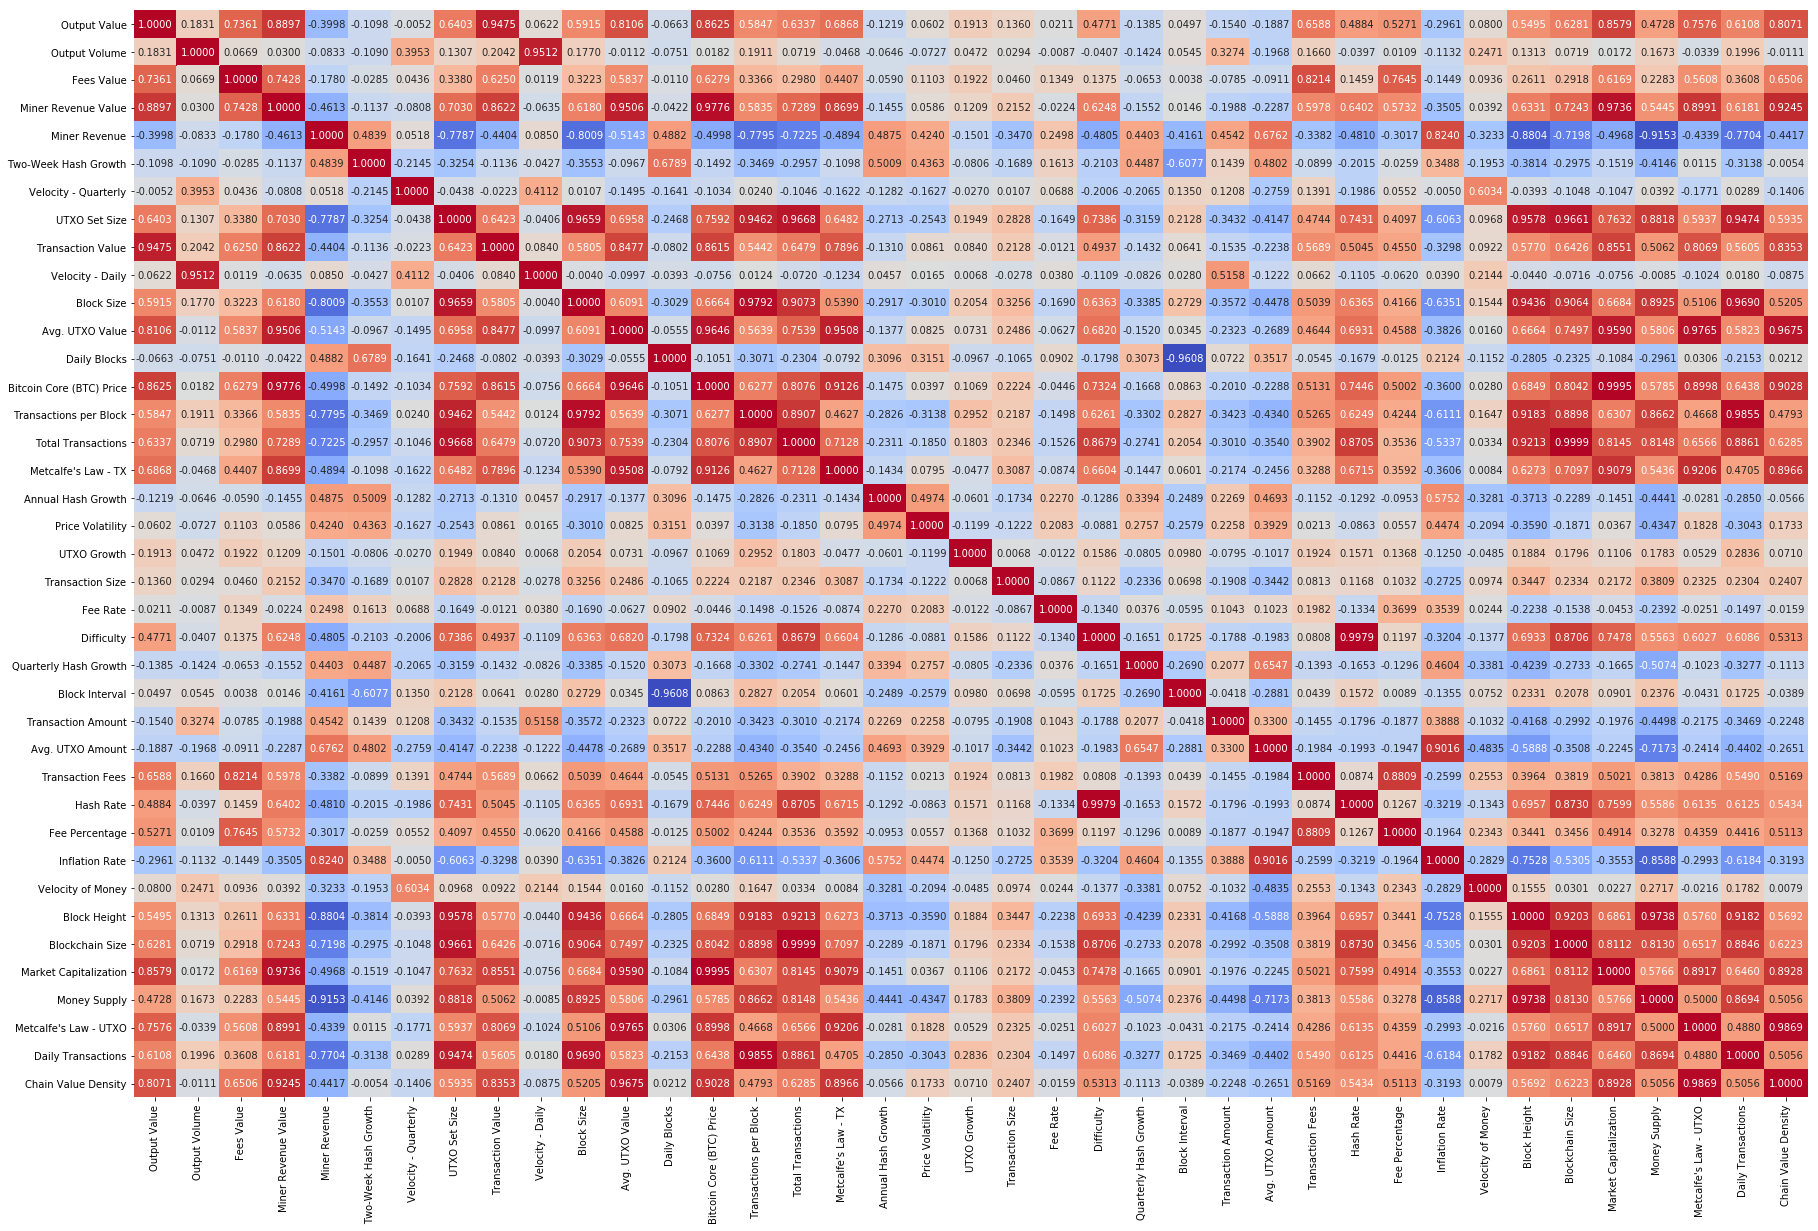

In [0]:
# FILE PATH FOR COLAB USER
# bitcoin_df = pd.read_excel('./data/bitcoin_data/bitcoin_merged.xlsx')
bitcoin_df = pd.read_excel('./bitcoin_merged.xlsx')

fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
sns.heatmap(bitcoin_df.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

### Label price change (not needed for now)

The code below uses the `bitcoin_merged.xlsx` file and adds a new column that marks if today's price is higher than the previous day's price. It is 1 if today's price is higher, otherwise 0.

The output is saved to `bitcoin_price_change.xlsx`.



In [0]:
# FILE PATH FOR COLAB USER
# bitcoin_df = pd.read_excel('./data/bitcoin_data/bitcoin_merged.xlsx')
df = pd.read_excel("./bitcoin_merged.xlsx")
today_price = df['Bitcoin Core (BTC) Price'].iloc[1:].tolist()
prev_price = df['Bitcoin Core (BTC) Price'].iloc[:-1].tolist()

In [0]:
change_price = pd.DataFrame([np.nan] + [1 if a_i - b_i >= 0 else 0 for a_i, b_i in zip(today_price, prev_price)])
df['Change'] = change_price

In [0]:
df = df.set_index(df['Date'])
df = df[['Bitcoin Core (BTC) Price', 'Change']]

In [0]:
df.to_csv("bitcoin_price_change.csv")

## Other cryptocurrencies (optional)

The code below could get the open, high, low, close, volume, and market capitalization information from https://coinmarketcap.com, and write the data to the corresponding csv files. You can also try to import these files to the model and see the performance.

> Import necessary packages



In [0]:
import re
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

> Data from 20150101 to today



In [0]:
from datetime import datetime
start = '20150101'
today = datetime.today().strftime('%Y%m%d')

### Litecoin

Use BeautifulSoup to read the html page.

In [0]:
url = 'https://coinmarketcap.com/currencies/litecoin/historical-data/?start='+start+'&end='+today
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
divs = soup.find_all(class_ = 'table-responsive')

Create a csv file to store the data.

In [0]:
csvfile = open('litecoin_data.csv', 'w')
header = ['Date','Open','High','Low','Close', 'Volume', 'Market Cap']
filewriter = csv.writer(csvfile)
filewriter.writerow(header)

44

Copy the needed information from the results found by BeautifulSoup to the csv file.

In [0]:
entries = soup.find_all('td')
temp = []
for i in range(len(entries)):
  
  if i % 7 == 0:
    if i != 0:
      filewriter.writerow(temp)
      temp = []
    temp.append(entries[i].text)
  else:
    temp.append(entries[i].text)
    temp = [temp[i].replace(',', '') for i in range(len(temp))]
    

Use pandas to read the csv and convert the non-date data to numeric.

In [0]:
df_1 = pd.read_csv('./litecoin_data.csv')
df_1.iloc[:,1:] = df_1.iloc[:,1:].apply(pd.to_numeric)

### Ethereum

Use BeautifulSoup to read the html page.

In [0]:
url = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start='+start+'&end='+today
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
divs = soup.find_all(class_ = 'table-responsive')

Create a csv file to store the data.

In [0]:
csvfile = open('ethereum_data.csv', 'w')
header = ['Open','High','Low','Close', 'Volume', 'Market Cap'] # not written to csv
filewriter = csv.writer(csvfile)
filewriter.writerow(header)

39

Copy the needed information from the results found by BeautifulSoup to the csv file.

In [0]:
entries = soup.find_all('td')
temp = []
for i in range(len(entries)):
  
  if i % 7 == 0:
    if i != 0:
      filewriter.writerow(temp)
      temp = []
    temp.append(entries[i].text)
  else:
    temp.append(entries[i].text)
    temp = [temp[i].replace(',', '') for i in range(len(temp))]

Use pandas to read the csv and convert the non-date data to numeric.

In [0]:
df_2 = pd.read_csv('./ethereum_data.csv')
df_2 = df_2.apply(pd.to_numeric)

Correlation matrix

In [0]:
corr = df_2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume,Market Cap
Open,1,0.998576,0.996522,0.996507,0.365062,0.996031
High,0.998576,1,0.996554,0.998482,0.369097,0.997609
Low,0.996522,0.996554,1,0.997996,0.36107,0.997858
Close,0.996507,0.998482,0.997996,1,0.366224,0.999354
Volume,0.365062,0.369097,0.36107,0.366224,1,0.388425
Market Cap,0.996031,0.997609,0.997858,0.999354,0.388425,1
